In [1]:
# Import Libaries and load dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

C:\Users\kavya\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# # Load the energy dataset
# file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
# energy_data = pd.read_csv(file_path)

# # Load the weather dataset
# file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
# weather_data = pd.read_csv(file_path)

In [4]:
energy_data = pd.read_csv('PROCESSED-Energy-Dataset-192-FINAL (1).csv',encoding= 'unicode_escape')
# Load the weather dataset
weather_data=pd.read_csv('Hourly-Weather-Data-Final.csv',encoding= 'unicode_escape') # Read weather dataset into a Pandas DataFrame

In [5]:
energy_data.columns

Index(['Smart Meter Id', 'Flats Category', 'Address', 'Street',
       'Building Name', 'Building Code', 'Periods', 'Seasons', 'Date',
       'TotaldailyenergyConsumption', '12.00 AM', '1.00 AM', '2.00 AM',
       '3.00 AM', '4.00 AM', '5.00 AM', '6.00 AM', '7.00 AM', '8.00 AM',
       '9.00 AM', '10.00 AM', '11.00 AM', '12.00 PM', '1.00 PM', '2.00 PM',
       '3.00 PM', '4.00 PM', '5.00 PM', '6.00 PM', '7.00 PM', '8.00 PM',
       '9.00 PM', '10.00 PM', '11.00 PM'],
      dtype='object')

In [6]:
weather_data.columns

Index(['DATE(dd/mm/yy)', 'TIME', 'TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)',
       'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)',
       'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)'],
      dtype='object')

# Monthly Energy Consumption Boxplot for University Flats (Jan 2022 - Mar 2023)

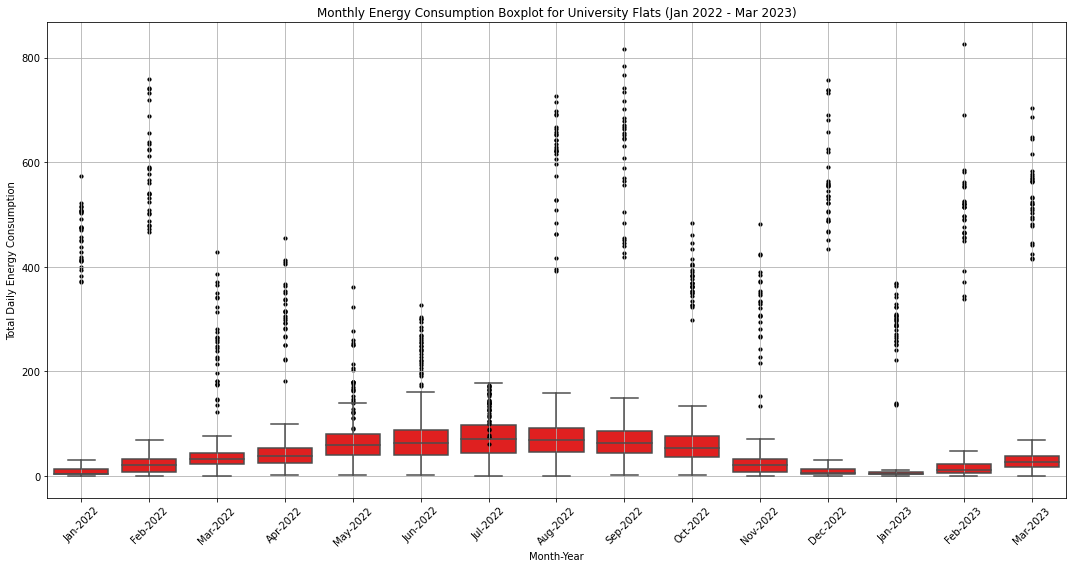

Statistics for Total Daily Energy Consumption at University Flats:
count    48941.000000
mean        42.556949
std         51.382372
min          0.000000
25%          9.150000
50%         31.840000
75%         60.150000
max        826.100000
Name: TotaldailyenergyConsumption, dtype: float64
Month-Year wise Outliers with Smart Meter Id and Address:
Index(['Month-Year', 'TotaldailyenergyConsumption'], dtype='object')
Sep 2022:


<ipython-input-7-0131944cc0bc>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_grouped.sort_values(by='Month-Year', inplace=True)


KeyError: 'Smart Meter Id'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the energy dataset

energy_data = pd.read_csv('PROCESSED-Energy-Dataset-192-FINAL (1).csv',encoding= 'unicode_escape')
# Filtering data for 'University Flats' only and creating a copy to avoid SettingWithCopyWarning
uni_flats_data = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()

# Converting 'Date' to datetime format and extracting month-year for plotting
uni_flats_data['Date'] = pd.to_datetime(uni_flats_data['Date'], format='%d/%m/%Y')
uni_flats_data['Month-Year'] = uni_flats_data['Date'].dt.strftime('%b-%Y')

# Filtering the dates as per the given range (Jan 2022 to Mar 2023)
start_date = datetime.strptime('01-01-2022', '%d-%m-%Y')
end_date = datetime.strptime('25-03-2023', '%d-%m-%Y')
filtered_data = uni_flats_data[(uni_flats_data['Date'] >= start_date) & (uni_flats_data['Date'] <= end_date)]

# Preparing data for boxplot
plot_data = filtered_data[['Month-Year', 'TotaldailyenergyConsumption']]

# Creating the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month-Year', y='TotaldailyenergyConsumption', data=plot_data, color='red', showfliers=False)

# Calculating the standard deviation and mean locally for each 'Month-Year'
grouped_data = plot_data.groupby('Month-Year')
outliers = pd.DataFrame()

for name, group in grouped_data:
    std_dev = group['TotaldailyenergyConsumption'].std()
    mean = group['TotaldailyenergyConsumption'].mean()
    outliers_grouped = group[(group['TotaldailyenergyConsumption'] > mean + 3 * std_dev) |
                           (group['TotaldailyenergyConsumption'] < mean - 3 * std_dev)]
    outliers = pd.concat([outliers, outliers_grouped])

# Adding outlier data points to the plot
plt.scatter(outliers['Month-Year'], outliers['TotaldailyenergyConsumption'], color='black', s=10)

# Improving the plot aesthetics
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Monthly Energy Consumption Boxplot for University Flats (Jan 2022 - Mar 2023)')
plt.xlabel('Month-Year')
plt.ylabel('Total Daily Energy Consumption')
plt.tight_layout()

# Displaying the plot
plt.show()

# Printing statistics
print("Statistics for Total Daily Energy Consumption at University Flats:")
print(filtered_data['TotaldailyenergyConsumption'].describe())

# Convert 'Month-Year' back to datetime to sort correctly
# outliers_grouped['Month-Year'] = pd.to_datetime(outliers_grouped['Month-Year'], format='%b-%Y')

# Ensure the sorting of dates is correct from Jan 2022 to Mar 2023
# outliers_grouped.sort_values(by='Month-Year', inplace=True)

# Display the sorted outliers with 'Smart Meter Id' and 'Address' for each 'Month-Year'
print("Month-Year wise Outliers with Smart Meter Id and Address:")
# for name, group in outliers_grouped.groupby('Month-Year'):
#     # Format the 'Month-Year' for display
#     display_month_year = name.strftime('%b %Y')
#     print(f"{display_month_year}:")
#     for index, row in group.iterrows():
#         print(f"  Smart Meter Id: {row['Smart Meter Id']}, Address: {row['Address']}")

# Use .loc to avoid SettingWithCopyWarning
outliers_grouped.loc[:, 'Month-Year'] = pd.to_datetime(outliers_grouped['Month-Year'], format='%b-%Y')
outliers_grouped.sort_values(by='Month-Year', inplace=True)

# Before looping through the DataFrame, ensure that 'Smart Meter Id' is a column in outliers_grouped
print(outliers_grouped.columns)  # This will show you all the columns in the DataFrame

# If 'Smart Meter Id' is in the columns, proceed with the loop
for name, group in outliers_grouped.groupby('Month-Year'):
    display_month_year = name.strftime('%b %Y')
    print(f"{display_month_year}:")
    for index, row in group.iterrows():
        # Ensure that 'Smart Meter Id' is the correct column name
        print(f"  Smart Meter Id: {row['Smart Meter Id']}, Address: {row['Address']}")


In [9]:
# Monthly Energy Consumption Boxplot for Residential College (Jan 2022 - Mar 2023)

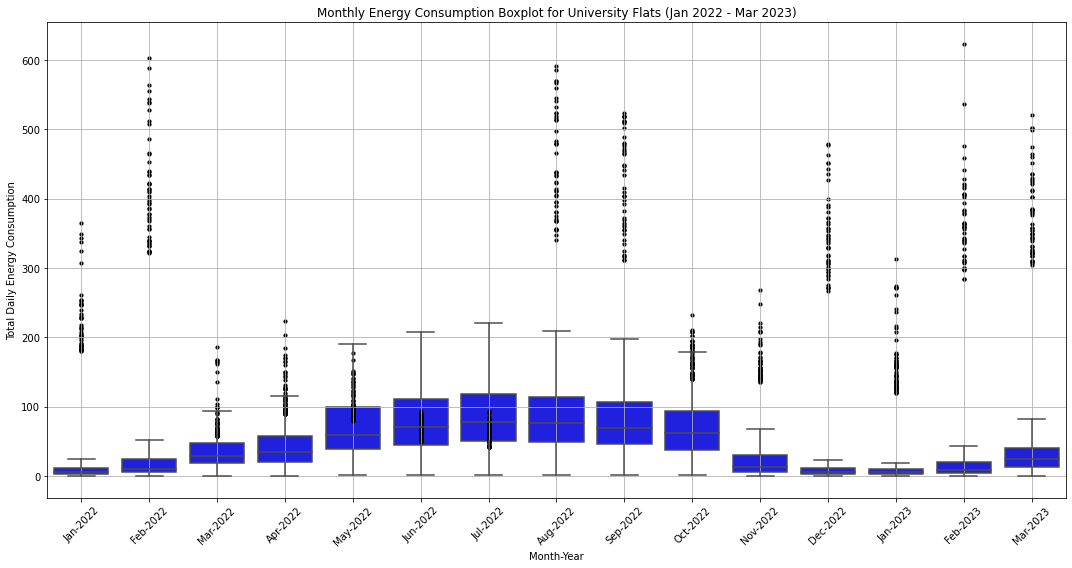

Statistics for Total Daily Energy Consumption at University Flats:
count    37267.000000
mean        49.557481
std         60.794040
min          0.000000
25%          7.820000
50%         29.710000
75%         68.430000
max        622.960000
Name: TotaldailyenergyConsumption, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the energy dataset
energy_data = pd.read_csv('PROCESSED-Energy-Dataset-192-FINAL (1).csv',encoding= 'unicode_escape')
# Filtering data for 'Residential College only and creating a copy to avoid SettingWithCopyWarning
uni_flats_data = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Converting 'Date' to datetime format and extracting month-year for plotting
uni_flats_data['Date'] = pd.to_datetime(uni_flats_data['Date'], format='%d/%m/%Y')
uni_flats_data['Month-Year'] = uni_flats_data['Date'].dt.strftime('%b-%Y')

# Filtering the dates as per the given range (Jan 2022 to Mar 2023)
start_date = datetime.strptime('01-01-2022', '%d-%m-%Y')
end_date = datetime.strptime('25-03-2023', '%d-%m-%Y')
filtered_data = uni_flats_data[(uni_flats_data['Date'] >= start_date) & (uni_flats_data['Date'] <= end_date)]

# Preparing data for boxplot
plot_data = filtered_data[['Month-Year', 'TotaldailyenergyConsumption']]

# Creating the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month-Year', y='TotaldailyenergyConsumption', data=plot_data, color='blue', showfliers=False)

# Calculating the standard deviation and mean locally for each 'Month-Year'
grouped_data = plot_data.groupby('Month-Year')
outliers = pd.DataFrame()

for name, group in grouped_data:
    std_dev = group['TotaldailyenergyConsumption'].std()
    mean = group['TotaldailyenergyConsumption'].mean()
    group_outliers = group[(group['TotaldailyenergyConsumption'] > mean + 3 * std_dev) |
                           (group['TotaldailyenergyConsumption'] < mean - 3 * std_dev)]
    outliers = pd.concat([outliers, group_outliers])

# Adding outlier data points to the plot
plt.scatter(outliers['Month-Year'], outliers['TotaldailyenergyConsumption'], color='black', s=10)

# Improving the plot aesthetics
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Monthly Energy Consumption Boxplot for University Flats (Jan 2022 - Mar 2023)')
plt.xlabel('Month-Year')
plt.ylabel('Total Daily Energy Consumption')
plt.tight_layout()

# Displaying the plot
plt.show()

# Printing statistics
print("Statistics for Total Daily Energy Consumption at University Flats:")
print(filtered_data['TotaldailyenergyConsumption'].describe())



# PLEASE WRITE THE CODE FOR OUTLIER TO BE DISPLAYED 

# Boxplot of Daily Energy Consumption for University Flats Street Wise (Smart meters Normalised)

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Filter for 'University Flats' entries
university_flats_data = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()

# Corrected column name for total daily energy consumption
corrected_column_name = 'TotaldailyenergyConsumption'

# Group data by Date
grouped_by_date = university_flats_data.groupby('Date')[corrected_column_name]

# Calculate mean and standard deviation for each date
mean_by_date = grouped_by_date.mean()
std_dev_by_date = grouped_by_date.std()

# Calculate upper and lower bounds for outliers for each date
upper_bound_by_date = mean_by_date + 3 * std_dev_by_date
lower_bound_by_date = mean_by_date - 3 * std_dev_by_date

# Apply the local thresholds to detect outliers
university_flats_data['Outlier'] = university_flats_data.apply(
    lambda row: (row[corrected_column_name] > upper_bound_by_date[row['Date']] or 
                 row[corrected_column_name] < lower_bound_by_date[row['Date']]),
    axis=1
)

# Create a boxplot for daily energy consumption, street-wise
plt.figure(figsize=(15, 8))
sns.boxplot(x='Street', y=corrected_column_name, data=university_flats_data, color='red', whis=1.5)

plt.title('Boxplot of Daily Energy Consumption for University Flats Street Wise')
plt.xlabel('Street')
plt.ylabel('Total Daily Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the boxplot
plt.show()

# Function to calculate IQR
def calculate_iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

# Initializing a dictionary to hold statistical values for each street
street_stats = {}

# Iterating over each street to calculate statistics
for street in university_flats_data['Street'].unique():
    street_data = university_flats_data[university_flats_data['Street'] == street]
    street_energy = street_data[corrected_column_name]

    # Calculating statistics
    street_mean = street_energy.mean()
    street_median = street_energy.median()
    street_std = street_energy.std()
    street_iqr = calculate_iqr(street_energy)

    # Storing statistics in the dictionary
    street_stats[street] = {
        'Mean': street_mean,
        'Median': street_median,
        'Standard Deviation': street_std,
        'IQR': street_iqr
    }

# Calculate the total number of unique smart meters for each street
total_meters_by_street = university_flats_data.groupby('Street')['Smart Meter Id'].nunique()

# Group data by 'Street' and get the count of unique Smart Meter IDs for outliers
outliers_by_street = university_flats_data[university_flats_data['Outlier']].groupby('Street')['Smart Meter Id'].nunique()

# Normalize the number of outliers by the total number of smart meters
normalized_outliers = outliers_by_street / total_meters_by_street

# Print the normalized number of smart meter outliers for each street
print("Normalized Number of Smart Meter Outliers for Each Street:")
for street, normalized_count in normalized_outliers.items():
    total_meters = total_meters_by_street.get(street, 0)
    outlier_count = outliers_by_street.get(street, 0)

    if total_meters == 0:
        print(f"{street}: No smart meters recorded.")
    elif outlier_count == 0:
        print(f"{street}: No outliers detected.")
    else:
        print(f"{street}: {normalized_count:.2f}")

# Identify unique smart meter IDs as outliers category-wise
outlier_ids_by_category = university_flats_data[university_flats_data['Outlier']].groupby('Flats Category')['Smart Meter Id'].unique()

# Print unique smart meter IDs as outliers for each category
print("Unique Smart Meter IDs as Outliers Category-wise:")
for category, smart_ids in outlier_ids_by_category.items():
    print(f"{category}: {smart_ids.tolist()}")


ImportError: Pandas requires version '2021.07.0' or newer of 'fsspec' (version '0.8.3' currently installed).

# Boxplot of Daily Energy Consumption for Residential College - Street Wise

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Filter for 'Residential College' entries
university_flats_data = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Corrected column name for total daily energy consumption
corrected_column_name = 'TotaldailyenergyConsumption'

# Group data by Date
grouped_by_date = university_flats_data.groupby('Date')[corrected_column_name]

# Calculate mean and standard deviation for each date
mean_by_date = grouped_by_date.mean()
std_dev_by_date = grouped_by_date.std()

# Calculate upper and lower bounds for outliers for each date
upper_bound_by_date = mean_by_date + 3 * std_dev_by_date
lower_bound_by_date = mean_by_date - 3 * std_dev_by_date

# Apply the local thresholds to detect outliers
university_flats_data['Outlier'] = university_flats_data.apply(
    lambda row: (row[corrected_column_name] > upper_bound_by_date[row['Date']] or 
                 row[corrected_column_name] < lower_bound_by_date[row['Date']]),
    axis=1
)

# Create a boxplot for daily energy consumption, street-wise
plt.figure(figsize=(15, 8))
sns.boxplot(x='Street', y=corrected_column_name, data=university_flats_data, color='blue', whis=1.5)

plt.title('Boxplot of Daily Energy Consumption for Residential College Street Wise')
plt.xlabel('Street')
plt.ylabel('Total Daily Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the boxplot
plt.show()

# Function to calculate IQR
def calculate_iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

# Initializing a dictionary to hold statistical values for each street
street_stats = {}

# Iterating over each street to calculate statistics
for street in university_flats_data['Street'].unique():
    street_data = university_flats_data[university_flats_data['Street'] == street]
    street_energy = street_data[corrected_column_name]

    # Calculating statistics
    street_mean = street_energy.mean()
    street_median = street_energy.median()
    street_std = street_energy.std()
    street_iqr = calculate_iqr(street_energy)

    # Storing statistics in the dictionary
    street_stats[street] = {
        'Mean': street_mean,
        'Median': street_median,
        'Standard Deviation': street_std,
        'IQR': street_iqr
    }

# Calculate the total number of unique smart meters for each street
total_meters_by_street = university_flats_data.groupby('Street')['Smart Meter Id'].nunique()

# Group data by 'Street' and get the count of unique Smart Meter IDs for outliers
outliers_by_street = university_flats_data[university_flats_data['Outlier']].groupby('Street')['Smart Meter Id'].nunique()

# Normalize the number of outliers by the total number of smart meters
normalized_outliers = outliers_by_street / total_meters_by_street

# Print the normalized number of smart meter outliers for each street
print("Normalized Number of Smart Meter Outliers for Each Street:")
for street, normalized_count in normalized_outliers.items():
    total_meters = total_meters_by_street.get(street, 0)
    outlier_count = outliers_by_street.get(street, 0)

    if total_meters == 0:
        print(f"{street}: No smart meters recorded.")
    elif outlier_count == 0:
        print(f"{street}: No outliers detected.")
    else:
        print(f"{street}: {normalized_count:.2f}")

# Identify unique smart meter IDs as outliers category-wise
outlier_ids_by_category = university_flats_data[university_flats_data['Outlier']].groupby('Flats Category')['Smart Meter Id'].unique()

# Print unique smart meter IDs as outliers for each category
print("Unique Smart Meter IDs as Outliers Category-wise:")
for category, smart_ids in outlier_ids_by_category.items():
    print(f"{category}: {smart_ids.tolist()}")


ImportError: Pandas requires version '2021.07.0' or newer of 'fsspec' (version '0.8.3' currently installed).

# The box plots for energy consumption by time of day for University Flats, street-wise ( Normalised Data - smart Meter count across street)


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Filter data for University Flats
uni_flats = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()

# Count the number of unique smart meters for each street
smart_meter_counts = uni_flats.groupby('Street')['Smart Meter Id'].nunique()

# Define the time ranges as columns with the correct column names (including spaces and AM/PM)
time_ranges = {
    '12am-6am': ['12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM', '4.00 AM', '5.00 AM'],
    '6am-12pm': ['6.00 AM', '7.00 AM', '8.00 AM', '9.00 AM', '10.00 AM', '11.00 AM'],
    '12pm-6pm': ['12.00 PM', '1.00 PM', '2.00 PM', '3.00 PM', '4.00 PM', '5.00 PM'],
    '6pm-12am': ['6.00 PM', '7.00 PM', '8.00 PM', '9.00 PM', '10.00 PM', '11.00 PM']
}

# Aggregating and normalizing data into the defined time ranges
for time_range, hours in time_ranges.items():
    uni_flats[time_range] = uni_flats[hours].sum(axis=1)
    for street, count in smart_meter_counts.items():
        street_filter = uni_flats['Street'] == street
        uni_flats.loc[street_filter, time_range] /= count

# Define the flier properties for smaller dot size
flierprops = dict(marker='o', markerfacecolor='black', markersize=2, linestyle='none')

# Find global min and max for setting y-axis limits
global_min = min(uni_flats[list(time_ranges.keys())].min())
global_max = max(uni_flats[list(time_ranges.keys())].max())

# Plotting the box plots for these time ranges street-wise
plt.figure(figsize=(20, 10))

# Create a box plot for each time range
for i, time_range in enumerate(time_ranges.keys(), 1):
    plt.subplot(1, 4, i)  # 4 subplots for 4 time ranges

    # Get normalized data for all streets in the current time range
    street_data = [uni_flats[uni_flats['Street'] == street][time_range].dropna() for street in uni_flats['Street'].unique()]

    # Create the box plot
    plt.boxplot(street_data, patch_artist=True, boxprops=dict(facecolor='red'), whiskerprops=dict(color='red'), capprops=dict(color='blue'), medianprops=dict(color='black'), flierprops=flierprops, whis=3)

    plt.title(time_range)
    plt.xticks(range(1, len(uni_flats['Street'].unique()) + 1), uni_flats['Street'].unique(), rotation=90)
    plt.ylabel('Normalized Energy Consumption (kWh per smart meter)')
    plt.ylim(global_min, global_max)  # Set the y-axis limits
    plt.grid(True)  # Ensure gridlines are added

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


###########################################################

# Identifying outliers using +- 3SD for each time range and including street names
outliers_info = {}
for time_range in time_ranges.keys():
    mean_value = uni_flats[time_range].mean()
    std_dev = uni_flats[time_range].std()
    lower_bound = mean_value - 3 * std_dev
    upper_bound = mean_value + 3 * std_dev

    # Identifying the smart meter IDs and their respective streets that are outliers in this time range
    outliers = uni_flats[(uni_flats[time_range] < lower_bound) | (uni_flats[time_range] > upper_bound)]
    outliers_info[time_range] = outliers[['Smart Meter Id', 'Street']].drop_duplicates().values.tolist()

outliers_info

ImportError: Pandas requires version '2021.07.0' or newer of 'fsspec' (version '0.8.3' currently installed).

# The box plots for energy consumption by time of day for Residential College, street-wise ( Normalised Data - Smart Meter Count)

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Filter data for Residential College
uni_flats = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Count the number of unique smart meters for each street
smart_meter_counts = uni_flats.groupby('Street')['Smart Meter Id'].nunique()

# Define the time ranges as columns with the correct column names (including spaces and AM/PM)
time_ranges = {
    '12am-6am': ['12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM', '4.00 AM', '5.00 AM'],
    '6am-12pm': ['6.00 AM', '7.00 AM', '8.00 AM', '9.00 AM', '10.00 AM', '11.00 AM'],
    '12pm-6pm': ['12.00 PM', '1.00 PM', '2.00 PM', '3.00 PM', '4.00 PM', '5.00 PM'],
    '6pm-12am': ['6.00 PM', '7.00 PM', '8.00 PM', '9.00 PM', '10.00 PM', '11.00 PM']
}

# Aggregating and normalizing data into the defined time ranges
for time_range, hours in time_ranges.items():
    uni_flats[time_range] = uni_flats[hours].sum(axis=1)
    for street, count in smart_meter_counts.items():
        street_filter = uni_flats['Street'] == street
        uni_flats.loc[street_filter, time_range] /= count

# Define the flier properties for smaller dot size
flierprops = dict(marker='o', markerfacecolor='black', markersize=2, linestyle='none')

# Find global min and max for setting y-axis limits
global_min = min(uni_flats[list(time_ranges.keys())].min())
global_max = max(uni_flats[list(time_ranges.keys())].max())

# Plotting the box plots for these time ranges street-wise
plt.figure(figsize=(20, 10))

# Create a box plot for each time range
for i, time_range in enumerate(time_ranges.keys(), 1):
    plt.subplot(1, 4, i)  # 4 subplots for 4 time ranges

    # Get normalized data for all streets in the current time range
    street_data = [uni_flats[uni_flats['Street'] == street][time_range].dropna() for street in uni_flats['Street'].unique()]

    # Create the box plot
    plt.boxplot(street_data, patch_artist=True, boxprops=dict(facecolor='blue'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'), medianprops=dict(color='black'), flierprops=flierprops, whis=3)

    plt.title(time_range)
    plt.xticks(range(1, len(uni_flats['Street'].unique()) + 1), uni_flats['Street'].unique(), rotation=90)
    plt.ylabel('Normalized Energy Consumption (kWh per smart meter)')
    plt.ylim(global_min, global_max)  # Set the y-axis limits
    plt.grid(True)  # Ensure gridlines are added

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


###########################################################

# Identifying outliers using +- 3SD for each time range and including street names
outliers_info = {}
for time_range in time_ranges.keys():
    mean_value = uni_flats[time_range].mean()
    std_dev = uni_flats[time_range].std()
    lower_bound = mean_value - 3 * std_dev
    upper_bound = mean_value + 3 * std_dev

    # Identifying the smart meter IDs and their respective streets that are outliers in this time range
    outliers = uni_flats[(uni_flats[time_range] < lower_bound) | (uni_flats[time_range] > upper_bound)]
    outliers_info[time_range] = outliers[['Smart Meter Id', 'Street']].drop_duplicates().values.tolist()

outliers_info

ImportError: Pandas requires version '2021.07.0' or newer of 'fsspec' (version '0.8.3' currently installed).

# BOX PLOT comparing average hourly energy consumption on weekdays versus weekends

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Data processing
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
energy_data['DayOfWeek'] = energy_data['Date'].dt.day_name()
energy_data['DayType'] = energy_data['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
energy_data['CategoryDayType'] = energy_data['Flats Category'] + ' - ' + energy_data['DayType']

# Create a copy to avoid SettingWithCopyWarning
plot_data = energy_data[['CategoryDayType', 'TotaldailyenergyConsumption', 'Smart Meter Id', 'Date']].copy()

# Calculate local statistics without warning
plot_data.loc[:, 'mean'] = plot_data.groupby(['CategoryDayType', 'Date'])['TotaldailyenergyConsumption'].transform('mean')
plot_data.loc[:, 'std'] = plot_data.groupby(['CategoryDayType', 'Date'])['TotaldailyenergyConsumption'].transform('std')
plot_data.loc[:, 'lower_bound'] = plot_data['mean'] - 3 * plot_data['std']
plot_data.loc[:, 'upper_bound'] = plot_data['mean'] + 3 * plot_data['std']
plot_data.loc[:, 'is_outlier'] = (plot_data['TotaldailyenergyConsumption'] < plot_data['lower_bound']) | \
                                 (plot_data['TotaldailyenergyConsumption'] > plot_data['upper_bound'])

# Filter data to exclude outliers for the plot
filtered_data = plot_data[~plot_data['is_outlier']]

# Define labels for x-axis
labels = ['University Flats\nWeekday', 'University Flats\nWeekend',
          'Residential College\nWeekday', 'Residential College\nWeekend']

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.boxplot(x='CategoryDayType', y='TotaldailyenergyConsumption', data=filtered_data,
                 palette={'University Flats - Weekday': 'red', 'University Flats - Weekend': 'red',
                          'Residential College - Weekday': 'blue', 'Residential College - Weekend': 'blue'},
                 showfliers=True, showmeans=True, meanline=True, whis=1.5)

# Setting labels and titles
ax.set_title('Comparison of Daily Energy Consumption: Weekday vs Weekends')
ax.set_xlabel('Flat Categories and Day Type')
ax.set_ylabel('Total Daily Energy Consumption (kWh)')
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.show()

# Extract outliers
outliers = plot_data[plot_data['is_outlier']]

# Group by 'CategoryDayType' and get unique 'Smart Meter Ids' for each category
outliers_by_category = outliers.groupby('CategoryDayType')['Smart Meter Id'].unique()

# Print outliers for each category
print("Outliers (Smart Meter Ids) for each CategoryDayType:")
for category, meter_ids in outliers_by_category.items():
    print(f"{category}: {list(meter_ids)}")




# Seasonal Comparison of Energy Consumption for Flat Categories

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Data processing
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
energy_data['DayOfWeek'] = energy_data['Date'].dt.dayofweek
energy_data['DayType'] = energy_data['DayOfWeek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Adding a unique identifier for each day
energy_data['DayID'] = energy_data['Date'].dt.strftime('%Y-%m-%d')

# Calculate local daily statistics
energy_data['DailyMean'] = energy_data.groupby(['Flats Category', 'Seasons', 'DayID'])['TotaldailyenergyConsumption'].transform('mean')
energy_data['DailyStd'] = energy_data.groupby(['Flats Category', 'Seasons', 'DayID'])['TotaldailyenergyConsumption'].transform('std')

# Calculate the z-scores for each data point
energy_data['ZScore'] = (energy_data['TotaldailyenergyConsumption'] - energy_data['DailyMean']) / energy_data['DailyStd']

# Filter data points that are within ±3 standard deviations
filtered_data = energy_data[energy_data['ZScore'].abs() <= 3]

# Create the box plot
plt.figure(figsize=(14, 10))
sns.boxplot(x='Seasons', y='TotaldailyenergyConsumption', hue='Flats Category',
            data=filtered_data, palette={'University Flats': 'red', 'Residential College': 'blue'},
            showfliers=True, whis=1.5)

# Enhance plot aesthetics
plt.title('Seasonal Comparison of Energy Consumption for Flat Categories', fontsize=16, weight='bold')
plt.xlabel('Season', fontsize=14, weight='bold')
plt.ylabel('Average Daily Energy Consumption (kWh)', fontsize=14, weight='bold')
plt.grid(True)
plt.legend(title='Flats Category', title_fontsize='13', fontsize='12', loc='upper right', frameon=True, fancybox=True).set_title('Flats Category', prop={'weight': 'bold'})

# Show the plot
plt.show()

# Identifying and printing outliers
outliers = energy_data[energy_data['ZScore'].abs() > 3]
outliers_grouped = outliers.groupby(['Flats Category', 'Seasons'])['Smart Meter Id'].unique()

print("Outliers (Smart Meter Ids) for each Category and Season:")
for (category, season), meter_ids in outliers_grouped.items():
    print(f"{category} - {season}: {list(meter_ids)}")


# Energy Consumption Comparison (Holidays vs. Term Time)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Convert 'Date' to datetime format with dayfirst=True
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
energy_data['DayID'] = energy_data['Date'].dt.strftime('%Y-%m-%d')

# Function to calculate and print outliers
def print_outliers(data, category_label):
    # Create an explicit copy of the DataFrame slice
    data_copy = data.copy()

    # Calculate daily statistics on the copy
    data_copy['DailyMean'] = data_copy.groupby(['DayID'])['TotaldailyenergyConsumption'].transform('mean')
    data_copy['DailyStd'] = data_copy.groupby(['DayID'])['TotaldailyenergyConsumption'].transform('std')

    # Calculate z-scores based on daily statistics
    data_copy['ZScore'] = (data_copy['TotaldailyenergyConsumption'] - data_copy['DailyMean']) / data_copy['DailyStd']

    # Identify outliers
    outliers = data_copy[np.abs(data_copy['ZScore']) > 3]
    unique_meters = outliers['Smart Meter Id'].unique()

    # Print unique smart meter IDs for outliers
    print(f"Unique smart meters for outliers in {category_label}: {unique_meters}")

# Filtering data for 'University Flats' and 'Residential College'
university_flats = energy_data[energy_data['Flats Category'] == 'University Flats']
residential_college = energy_data[energy_data['Flats Category'] == 'Residential College']

# Print outliers for each category and period
print_outliers(university_flats[university_flats['Periods'] == 'Holiday'], 'Uni Flats - Holiday')
print_outliers(university_flats[university_flats['Periods'] == 'Term Time'], 'Uni Flats - Term Time')
print_outliers(residential_college[residential_college['Periods'] == 'Holiday'], 'Res College - Holiday')
print_outliers(residential_college[residential_college['Periods'] == 'Term Time'], 'Res College - Term Time')

# Preparing data for box plot
data_to_plot = [
    university_flats[university_flats['Periods'] == 'Holiday']['TotaldailyenergyConsumption'],
    university_flats[university_flats['Periods'] == 'Term Time']['TotaldailyenergyConsumption'],
    residential_college[residential_college['Periods'] == 'Holiday']['TotaldailyenergyConsumption'],
    residential_college[residential_college['Periods'] == 'Term Time']['TotaldailyenergyConsumption']
]

# Labels for the box plot
labels = ['Uni Flats - Holiday', 'Uni Flats - Term Time', 'Res College - Holiday', 'Res College - Term Time']

# Creating the box plot
plt.figure(figsize=(10, 6))
bplot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, showfliers=True)

# Coloring the boxes
box_colors = ['red', 'red', 'blue', 'blue']
for patch, color in zip(bplot['boxes'], box_colors):
    patch.set_facecolor(color)

plt.title('Energy Consumption Comparison (Holidays vs. Term Time)')
plt.ylabel('Total Daily Energy Consumption')
plt.grid(True)
plt.show()



# Day vs Night Energy Consumption in University Flats and Residential Colleges

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Filter data for University Flats and Residential Colleges
university_flats = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()
residential_colleges = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Define day and night hours
day_hours = ['6.00 AM', '7.00 AM', '8.00 AM', '9.00 AM', '10.00 AM', '11.00 AM',
'12.00 PM', '1.00 PM', '2.00 PM', '3.00 PM', '4.00 PM', '5.00 PM']
night_hours = ['6.00 PM', '7.00 PM', '8.00 PM', '9.00 PM', '10.00 PM', '11.00 PM',
'12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM', '4.00 AM', '5.00 AM']

# Calculate day and night consumption
university_flats['Day Consumption'] = university_flats[day_hours].sum(axis=1)
university_flats['Night Consumption'] = university_flats[night_hours].sum(axis=1)
residential_colleges['Day Consumption'] = residential_colleges[day_hours].sum(axis=1)
residential_colleges['Night Consumption'] = residential_colleges[night_hours].sum(axis=1)

# Convert 'Date' to datetime format with dayfirst=True
university_flats['Date'] = pd.to_datetime(university_flats['Date'], dayfirst=True)
residential_colleges['Date'] = pd.to_datetime(residential_colleges['Date'], dayfirst=True)
university_flats['DayID'] = university_flats['Date'].dt.strftime('%Y-%m-%d')
residential_colleges['DayID'] = residential_colleges['Date'].dt.strftime('%Y-%m-%d')

def print_outliers(data, category_label):
    data_copy = data.copy()
    for col in ['Day Consumption', 'Night Consumption']:
        mean_col = data_copy.groupby('DayID')[col].transform('mean')
        std_col = data_copy.groupby('DayID')[col].transform('std')
        data_copy[f'{col} ZScore'] = (data_copy[col] - mean_col) / std_col

    day_outliers = data_copy[np.abs(data_copy['Day Consumption ZScore']) > 3]
    night_outliers = data_copy[np.abs(data_copy['Night Consumption ZScore']) > 3]
    outliers = pd.concat([day_outliers, night_outliers]).drop_duplicates()
    unique_meters = outliers['Smart Meter Id'].unique()
    print(f"Unique smart meters for outliers in {category_label}: {unique_meters}")

# Print outliers for University Flats and Residential Colleges
print_outliers(university_flats, 'University Flats')
print_outliers(residential_colleges, 'Residential Colleges')

# Combining data for box plot
combined_data = pd.concat([university_flats[['Day Consumption', 'Night Consumption']].assign(Location='University Flats'),
residential_colleges[['Day Consumption', 'Night Consumption']].assign(Location='Residential Colleges')])

# Plotting box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='value', hue='variable', data=pd.melt(combined_data, ['Location']), palette=['red', 'blue'])
plt.title('Day vs Night Energy Consumption in University Flats and Residential Colleges')
plt.xlabel('Location')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.show()

In [ ]:
##The boxplot for energy consumption by Smart Meter ID for the period January 2022 to March 2023

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for boxplot, grouped by Smart Meter Id
plot_data = filtered_data[['Smart Meter Id', 'TotaldailyenergyConsumption']]

# Creating the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Smart Meter Id', y='TotaldailyenergyConsumption', data=plot_data, color='blue', showfliers=False)

# Calculating the standard deviation and mean for each Smart Meter Id
grouped_data = plot_data.groupby('Smart Meter Id')
outliers = pd.DataFrame()

for name, group in grouped_data:
    std_dev = group['TotaldailyenergyConsumption'].std()
    mean = group['TotaldailyenergyConsumption'].mean()
    group_outliers = group[(group['TotaldailyenergyConsumption'] > mean + 3 * std_dev) |
                           (group['TotaldailyenergyConsumption'] < mean - 3 * std_dev)]
    outliers = pd.concat([outliers, group_outliers])

# Adding outlier data points to the plot
plt.scatter(outliers['Smart Meter Id'], outliers['TotaldailyenergyConsumption'], color='black', s=10)

# Improving the plot aesthetics
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Energy Consumption Boxplot by Smart Meter ID (Jan 2022 - Mar 2023)')
plt.xlabel('Smart Meter ID')
plt.ylabel('Total Daily Energy Consumption')
plt.tight_layout()

# Displaying the plot
plt.show()

# Merging outlier data with original data to get address information
outliers_with_details = outliers.merge(energy_data, on=['Smart Meter Id', 'TotaldailyenergyConsumption'])

# Displaying a summary of the outlier data with Smart Meter ID and Address
outlier_summary = outliers_with_details[['Smart Meter Id', 'Address', 'TotaldailyenergyConsumption']].drop_duplicates()
outlier_summary.head()


In [ ]:
##The boxplot for monthly energy consumption by Smart Meter ID for the period January 2022 to March 2023

In [ ]:
# Extracting month and year from the date and creating a new column for it
filtered_data['Month-Year'] = filtered_data['Date'].dt.to_period('M')

# Grouping and summing the total energy consumption by month and Smart Meter ID
monthly_data = filtered_data.groupby(['Smart Meter Id', 'Month-Year'])['TotaldailyenergyConsumption'].sum().reset_index()

# Preparing data for the boxplot
plot_data_monthly = monthly_data[['Smart Meter Id', 'TotaldailyenergyConsumption', 'Month-Year']]

# Creating the boxplot for monthly data
plt.figure(figsize=(15, 8))
sns.boxplot(x='Smart Meter Id', y='TotaldailyenergyConsumption', data=plot_data_monthly, color='green', showfliers=False)

# Calculating the standard deviation and mean for each Smart Meter Id on a monthly basis
grouped_data_monthly = plot_data_monthly.groupby('Smart Meter Id')
outliers_monthly = pd.DataFrame()

for name, group in grouped_data_monthly:
    std_dev = group['TotaldailyenergyConsumption'].std()
    mean = group['TotaldailyenergyConsumption'].mean()
    group_outliers = group[(group['TotaldailyenergyConsumption'] > mean + 3 * std_dev) |
                           (group['TotaldailyenergyConsumption'] < mean - 3 * std_dev)]
    outliers_monthly = pd.concat([outliers_monthly, group_outliers])

# Adding outlier data points to the plot
plt.scatter(outliers_monthly['Smart Meter Id'], outliers_monthly['TotaldailyenergyConsumption'], color='black', s=10)

# Improving the plot aesthetics
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Monthly Energy Consumption Boxplot by Smart Meter ID (Jan 2022 - Mar 2023)')
plt.xlabel('Smart Meter ID')
plt.ylabel('Total Monthly Energy Consumption')
plt.tight_layout()

# Displaying the plot
plt.show()

# Merging outlier data with original data to get address information
outliers_monthly_with_details = outliers_monthly.merge(energy_data, on=['Smart Meter Id', 'TotaldailyenergyConsumption'])

# Displaying a summary of the outlier data with Smart Meter ID and Address
outlier_monthly_summary = outliers_monthly_with_details[['Smart Meter Id', 'Address', 'TotaldailyenergyConsumption']].drop_duplicates()
outlier_monthly_summary.head()

In [ ]:
# GEOSPATIAL PLOT CODE DUNEDINE CITY , NZ import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from tqdm import tqdm  # for progress bar

# Initialize the geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Load the dataset
energy_data = pd.read_csv('PROCESSED-Energy-Dataset-192-FINAL (1).csv',encoding= 'unicode_escape')
# Function to geocode address
def geocode_address(address):
    try:
        location = geolocator.geocode(address + ", Dunedin, New Zealand")
        return Point(location.longitude, location.latitude)
    except:
        return None

# Apply geocoding to the Address column (progress bar with tqdm)
tqdm.pandas()
energy_data['geometry'] = energy_data['Address'].progress_apply(geocode_address)

# Drop rows where geocoding failed
energy_data = energy_data.dropna(subset=['geometry'])

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(energy_data, geometry='geometry')
gdf.crs = "EPSG:4326"

# Load a map of New Zealand
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
nz_map = world[world.name == "New Zealand"]

# Define the bounding box for Dunedin
# These values can be adjusted to better fit the data points
dunedin_bounds = {
    "min_lon": 170.4,
    "min_lat": -45.95,
    "max_lon": 170.7,
    "max_lat": -45.8
}

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
nz_map.to_crs(epsg=4326).plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='blue', markersize=10)

# Set the bounds for the Dunedin area
ax.set_xlim([dunedin_bounds['min_lon'], dunedin_bounds['max_lon']])
ax.set_ylim([dunedin_bounds['min_lat'], dunedin_bounds['max_lat']])

plt.title('Smart Meter Locations in Dunedin, New Zealand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
import pandas as pd
from fbprophet import Prophet
energy_data = pd.read_csv('PROCESSED-Energy-Dataset-192-FINAL (1).csv',encoding= 'unicode_escape')
# Load the weather dataset
weather_data=pd.read_csv('Hourly-Weather-Data-Final.csv',encoding= 'unicode_escape') # Read weather dataset into a Pandas DataFrame
# Preprocess the weather data

weather_data['DateTime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'])
weather_data = weather_data.set_index('DateTime')
weather_data_relevant = weather_data[['TEMP(oC)', 'GLOBAL(W/m2)']]

# Preprocess the energy data
energy_data['Date'] = pd.to_datetime(energy_data['Date'])
energy_data_daily = energy_data.groupby('Date')['TotaldailyenergyConsumption'].sum()

# Ensure unique indices
weather_data_unique = weather_data_relevant[~weather_data_relevant.index.duplicated(keep='first')]
energy_data_unique = energy_data_daily[~energy_data_daily.index.duplicated(keep='first')]

# Merge and aggregate the datasets
combined_data = pd.concat([weather_data_unique, energy_data_unique], axis=1, join='inner')
combined_data_weekly = combined_data.resample('W').mean()
combined_data_weekly['TotaldailyenergyConsumption'] = combined_data.resample('W').sum()['TotaldailyenergyConsumption']

# Prepare data for Prophet
combined_data_weekly.reset_index(inplace=True)
combined_data_weekly.rename(columns={'DateTime': 'ds', 'TotaldailyenergyConsumption': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet()
model.add_regressor('TEMP(oC)')
model.add_regressor('GLOBAL(W/m2)')
model.fit(combined_data_weekly)

# Make future dataframe for forecasts
future = model.make_future_dataframe(periods=4, freq='W')  # Adjust periods for your forecast horizon

# Predict future values
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())  # Tail shows the forecasted values

In [ ]:
!pip install fbprophet

In [ ]:
!pip install Cython

In [ ]:
!pip install pystan